### Analyzing tweakreg shifts

Karl Gordon

12 Jun 2022

In [1]:
from tweakwcs import JWSTgWCS
from jwst import datamodels
import numpy as np
import glob

In [2]:
RAD2ARCSEC = 3600.0 * np.rad2deg(1.0)

filter = "F770W"
twfiles = np.sort(glob.glob(f"./{filter}/stage3/*wcs_tweakreg.fits"))

shifts = np.zeros((2, len(twfiles)))
for k, cfile in enumerate(twfiles):
    # extract x,y shifts from the aligned image:
    aligned_model = datamodels.open(cfile)
    matrix = aligned_model.meta.wcs.forward_transform['tp_affine'].matrix.value
    cshift = RAD2ARCSEC * aligned_model.meta.wcs.forward_transform['tp_affine'].translation.value
    shifts[:, k] = cshift
    print(cfile, cshift)

./F770W/stage3/jw02729002001_02101_00001_mirimage_fixed_wcs_tweakreg.fits [ 0.22430049 -0.93924847]
./F770W/stage3/jw02729002001_02101_00002_mirimage_fixed_wcs_tweakreg.fits [ 0.24171048 -0.93556712]
./F770W/stage3/jw02729002001_02101_00003_mirimage_fixed_wcs_tweakreg.fits [ 0.24434725 -0.93101066]
./F770W/stage3/jw02729002001_02101_00004_mirimage_fixed_wcs_tweakreg.fits [ 0.22528784 -0.93490049]
./F770W/stage3/jw02729002001_02101_00005_mirimage_fixed_wcs_tweakreg.fits [ 0.22641986 -0.92929237]
./F770W/stage3/jw02729002001_02101_00006_mirimage_fixed_wcs_tweakreg.fits [ 0.23310651 -0.91495165]
./F770W/stage3/jw02729002001_02101_00007_mirimage_fixed_wcs_tweakreg.fits [ 0.24584458 -0.93020625]
./F770W/stage3/jw02729002001_02101_00008_mirimage_fixed_wcs_tweakreg.fits [ 0.22169037 -0.94081181]
./F770W/stage3/jw02729002001_02101_00009_mirimage_fixed_wcs_tweakreg.fits [ 0.23478949 -0.93417591]
./F770W/stage3/jw02729002001_02101_00010_mirimage_fixed_wcs_tweakreg.fits [ 0.24469864 -0.92661495]


0 0.2342195515193774 -0.9316779689106902
1 0.7884962280416655 -0.09212854823862968


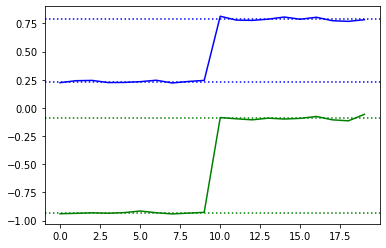

In [3]:
import matplotlib.pyplot as plt

plt.plot(range(len(twfiles)), shifts[0, :], "b-")
plt.plot(range(len(twfiles)), shifts[1, :], "g-")

from astropy.stats import sigma_clip

# determine the aveage values for each tile
for k in range(2):
    k1 = k*10
    k2 = k1 + 10
    avex = np.average(sigma_clip(shifts[0, k1:k2]))
    avey = np.average(sigma_clip(shifts[1, k1:k2]))
    print(k, avex, avey)
    plt.axhline(avex, linestyle="dotted", color="b")
    plt.axhline(avey, linestyle="dotted", color="g")